# Градиентный спуск


## Теория
Последовательность $x_k$ генерируется по правилу

$$
x_{k+1} = x_k + \alpha_k h_k
$$

так что

$$
f(x_{k+1}) < f(x_k)
$$

Направление антиградиента 

$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$

даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид

$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

Теперь озаботмся выбором $\alpha$:
 Наискорейший спуск

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

Заметим что данная задача является одномерной и для ее решения можно воспользоваться методом золотого сечения

Text(0.5, 1.0, 'График зависимости времени от размерности пространства')

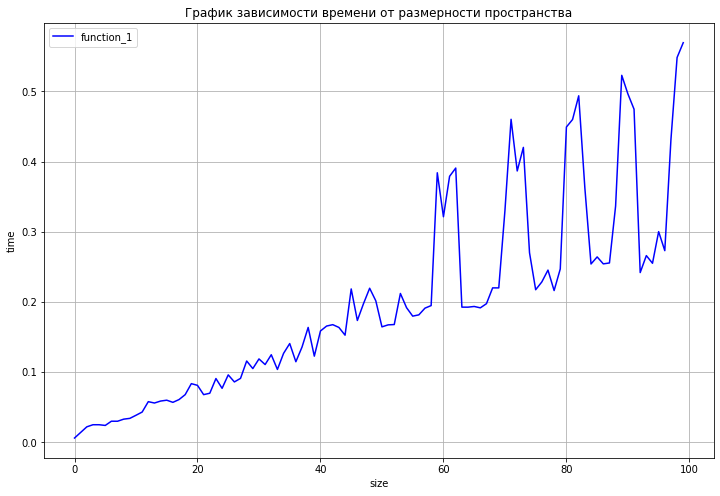

In [17]:
import matplotlib.pyplot as plt
from time import time
import sympy as sp
import numpy as np
import math as mt
import numpy.linalg as la
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
%matplotlib inline


def grad(z):
    gradient = 0
    for i in range(0, size):
                gradient = gradient + mt.exp(z[i])/10-2/10
    return gradient

#исследуемые функции
def function(y):
    global size
    funct = 0
    for i in range(0, size):
        funct = funct + (mt.exp(y[i]) - 2*y[i])/10
    return funct

def gd(x, f,  max_iter=100):
    min = np.zeros((max_iter+1, len(x)))
    min[0] = x.ravel()
    for i in range(max_iter):
        res = minimize_scalar(lambda alpha: f(x - alpha * grad_1(x)))
        alpha = res.x
        x = x - alpha * grad_1(x)
        min[i+1] = x.ravel()
    return min


k = 0
time1 = np.zeros(100)

for size in range(0, 100):
    
    iterations = 5
    begin1 = time()
    x0 = np.zeros(size).reshape([-1,1])
    min = gd(x0, function_1, max_iter=15)
    end1 = time()
    time1[k] = end1 - begin1
    k = k+1
    #print(time1)
    #print (min)



plt.figure(figsize = (12,8))
axixx = np.arange(100)
plt.plot(axixx, time1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('size') 
plt.ylabel('time')
plt.title('График зависимости времени от размерности пространства')

In [18]:
import matplotlib.pyplot as plt
from time import time
import sympy as sp
import numpy as np
import math as mt
import numpy.linalg as la
from scipy.optimize import minimize_scalar
from scipy.misc import derivative

#слагаемые исследуемых функций
def f( x):
    return (mt.exp(x) - 2*x)/10

def grad(z):
    gradient = 0
    for i in range(0, size):
                gradient = gradient + mt.exp(z[i])/10-2/10
    return gradient

#исследуемые функции
def function(y):
    global size
    funct = 0
    for i in range(0, size):
        funct = funct + (mt.exp(y[i]) - 2*y[i])/10
    return funct

def gd(x, f,  max_iter=100):
    min = np.zeros((max_iter+1, len(x)))
    min[0] = x.ravel()
    for i in range(max_iter):
        res = minimize_scalar(lambda alpha: f(x - alpha * grad(x)))
        #print(res.x[0])
        alpha = res.x
        x = x - alpha * grad(x)
        min[i+1] = x.ravel()
        #print(min[i+1][0])
        e1[i] = min[i+1][0]
        k1[i] = i
    return min

e1 = np.zeros(100)
k1 = np.zeros(100)
#min = np.zeros(100)
x0 = np.zeros(size).reshape([-1,1])
min = gd(x0, function, max_iter=100)
#print (min)

Text(0.5, 1.0, 'График зависимости точки минимума от числа итераций')

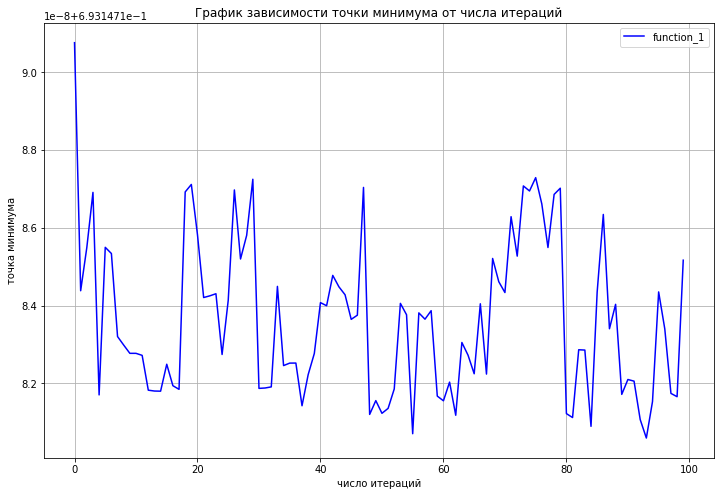

In [19]:

plt.figure(figsize = (12,8))
plt.plot( k1, e1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('число итераций') 
plt.ylabel('точка минимума')
plt.title('График зависимости точки минимума от числа итераций')

In [20]:
import matplotlib.pyplot as plt
from time import time
import sympy as sp
import numpy as np
import math as mt
import numpy.linalg as la
from scipy.optimize import minimize_scalar
from scipy.misc import derivative

#слагаемые исследуемых функций
def f( x):
    return (mt.exp(x) - 2*x)/10


def grad(z):
    gradient = 0
    for i in range(0, size):
                gradient = gradient + mt.exp(z[i])/10-2/10
    return gradient

#исследуемые функции
def function(y):
    global size
    funct = 0
    for i in range(0, size):
        funct = funct + (mt.exp(y[i]) - 2*y[i])/10
    return funct

def gd(x, f,  max_iter=100):
    min = np.zeros((max_iter+1, len(x)))
    min[0] = x.ravel()
    for i in range(max_iter):
        res = minimize_scalar(lambda alpha: f(x - alpha * grad(x)))
        #print(res.x[0])
        alpha = res.x
        x = x - alpha * grad(x)
        min[i+1] = x.ravel()
        #print(min[i+1][0])
        e1[i] = min[i+1][0]
        k1[i] = i
    return min
iteration = 100
time1 = np.zeros(iteration)
k1 = np.zeros(iteration)
for i in range (iteration):
    begin1 = time()
    x0 = np.zeros(size).reshape([-1,1])
    min = gd(x0, function, max_iter=i)
    end1 = time()
    time1[i] = end1 - begin1
    k1[i] = i


Text(0.5, 1.0, 'График зависимости времени от количества итераций')

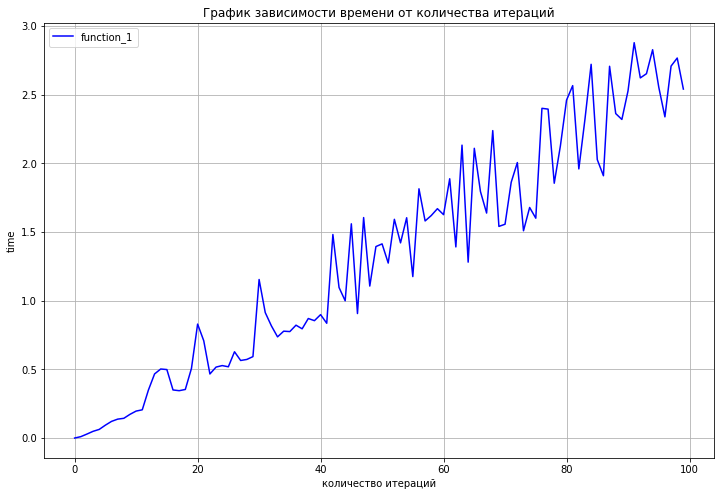

In [21]:
plt.figure(figsize = (12,8))
plt.plot(k1, time1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('количество итераций') 
plt.ylabel('time')
plt.title('График зависимости времени от количества итераций')